<a href="https://colab.research.google.com/github/ankit-singh973/Deep_Learning_tensorflow/blob/main/1.1_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Regression with Neural Networks in Tensorflow**
- Predicting a numerical variable (dependent variable) based on combination of other variables (independent variables)

In [ ]:
# import tensorflow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.14.0


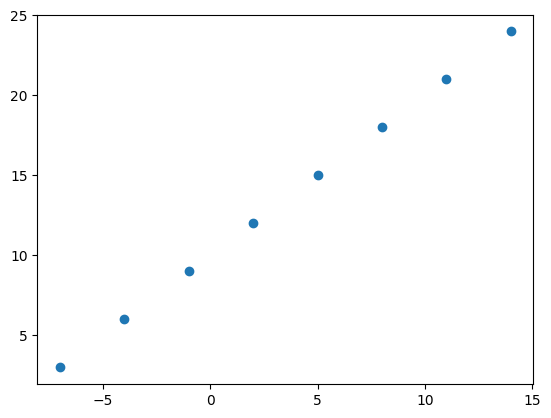

In [ ]:
#create some data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#create features (independent variables)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels (dependent varibales)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)

## **`y = X+10`**

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
input_shape = X.shape
input_shape

(8,)

In [ ]:
output_shape = y.shape
output_shape

(8,)

In [ ]:
#turn our numpy arrays into tensors with float32
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape #these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

## **Steps in modelling with tensorflow**

1.  **Creating a model** - define the input and output layers, as well as the hidden layers of the deep learning model.
2. **Compiling a model** - define the `loss function` (in other words the function which tells our model how wrong it is) and the `optimizer` (tells oue model how to mporve the patterns and it's learning) and `evalation metrics` (what can we do to interpret the performance of our model).
3. **Fitting a model**  - letting the model try to find patterns between `X` & `y` (features and lebels)

In [ ]:
# Set random seed
tf.keras.utils.set_random_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 460ms/step - loss: 9.1572 - mae: 9.1572
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 9.0247 - mae: 9.0247
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 8.8922 - mae: 8.8922
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 8.7597 - mae: 8.7597
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 8.6272 - mae: 8.6272
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 8.4947 - mae: 8.4947
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 8.3622 - mae: 8.3622
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 8.2297 - mae: 8.2297
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 8.0972 - mae: 8.0972
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 7.9647 - mae: 7.9647


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# make a prediction with the model
model.predict([18.0])

1/1 [==============================] - 0s 91ms/step


array([[28.734455]], dtype=float32)

- **So our model trained well**

### **A typical workflow for building neural networks is:**

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

In [ ]:
#make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

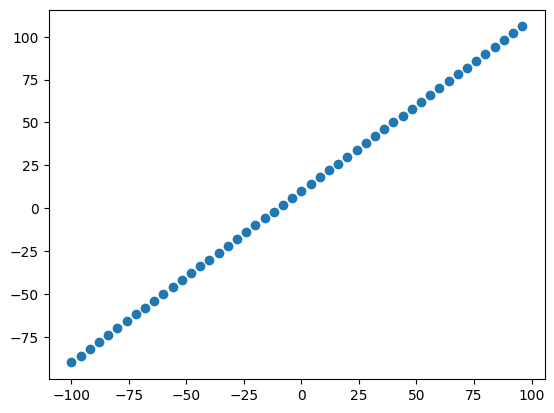

In [ ]:
 import matplotlib.pyplot as plt

 plt.scatter(X,y)

In [ ]:
len(X)

50

# **Train test split**

In [ ]:
#slpit the data into train and test sets
X_train = X[:40] # 80% of the data
y_train = y[:40]

X_test = X[40:] # 20% of the data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

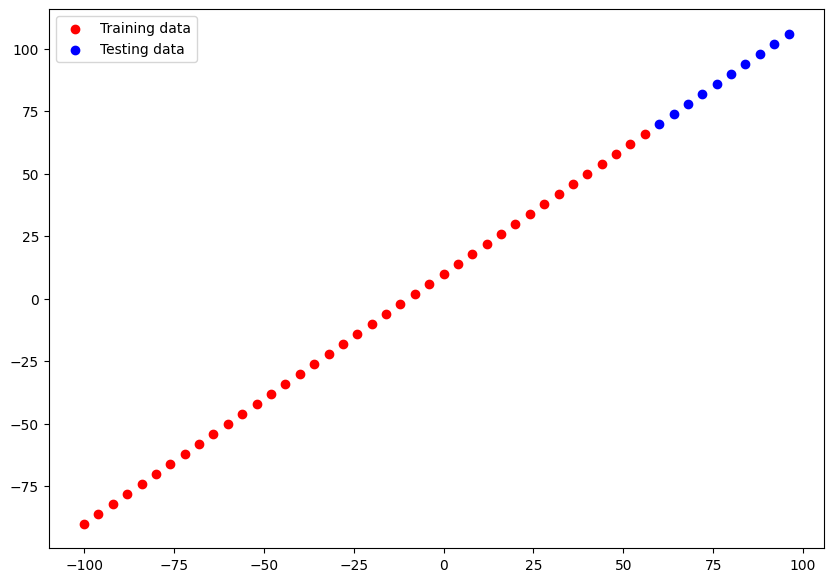

In [ ]:
## visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'red', label = 'Training data')
plt.scatter(X_test, y_test, c='blue', label = 'Testing data')
plt.legend()

In [ ]:
# let's build neural network for our model
tf.keras.utils.set_random_seed(42)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = 'input_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'rawan_1')

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.0001),
              metrics=["mae"])

# fit the model
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
2/2 [==============================] - 0s 13ms/step - loss: 33.8817 - mae: 33.8817
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 28.1546 - mae: 28.1546
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 32.1940 - mae: 32.1940
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 13.5831 - mae: 13.5831
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 18.4541 - mae: 18.4541
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 9.3091 - mae: 9.3091
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 10.3237 - mae: 10.3237
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 11.2590 - mae: 11.2590
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 42.3519 - mae: 42.3519
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 29.5043 - mae: 29.5043
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - loss:

In [ ]:
model.summary()

Model: "rawan_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X[1], y[1]

(<tf.Tensor: shape=(), dtype=int32, numpy=-96>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-86>)

In [ ]:
model.predict([-86.0])

1/1 [==============================] - 0s 67ms/step


array([[-91.850746]], dtype=float32)

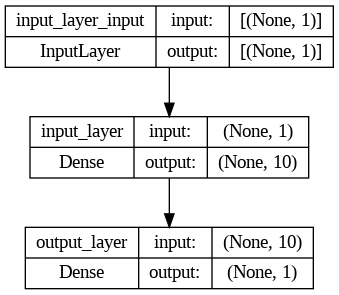

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

# **Visualizing model predictions**

In [ ]:
# make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 49ms/step


array([[ 65.55178 ],
       [ 69.86418 ],
       [ 74.17658 ],
       [ 78.48898 ],
       [ 82.801384],
       [ 87.11378 ],
       [ 91.42618 ],
       [ 95.73857 ],
       [100.05097 ],
       [104.36337 ]], dtype=float32)

In [ ]:
# ground truth labels
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# lets create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize = (10, 7))

  #plot training data
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")

  #plot test data
  plt.scatter(test_data,test_labels, c = "g", label = "Testing data")

  #plot prediction data
  plt.scatter(test_data, predictions, c = "r", label = "Prediction data")

  plt.legend()

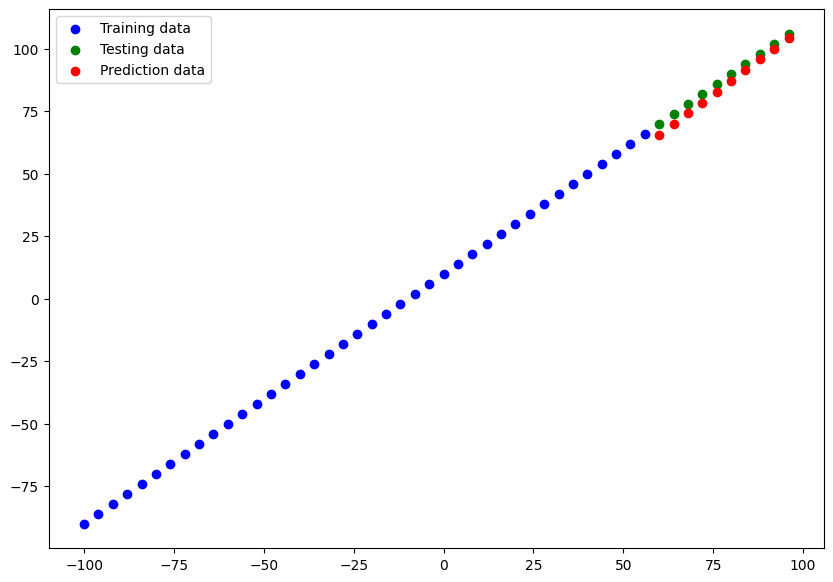

In [ ]:
plot_predictions()

## **Evaluating our model**

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 141ms/step - loss: 3.0424 - mae: 3.0424


[3.042423963546753, 3.042423963546753]

In [ ]:
y_pred

array([[ 65.55178 ],
       [ 69.86418 ],
       [ 74.17658 ],
       [ 78.48898 ],
       [ 82.801384],
       [ 87.11378 ],
       [ 91.42618 ],
       [ 95.73857 ],
       [100.05097 ],
       [104.36337 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

#### **Changing the shape of `y_pred` to (10,) because shape of `y_pred` and `y_test` must be same**

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 65.55178 ,  69.86418 ,  74.17658 ,  78.48898 ,  82.801384,
        87.11378 ,  91.42618 ,  95.73857 , 100.05097 , 104.36337 ],
      dtype=float32)>

In [ ]:
# claculate the absolute error
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.0424218>

In [ ]:
# calculate mean square error
mse = tf.metrics.mean_squared_error(y_true= y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.061471>

In [ ]:
# make some functions to use mae and mse

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
y_pred = model_1.predict(X_test)

1/1 [==============================] - 0s 78ms/step


In [ ]:
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2.9700577>

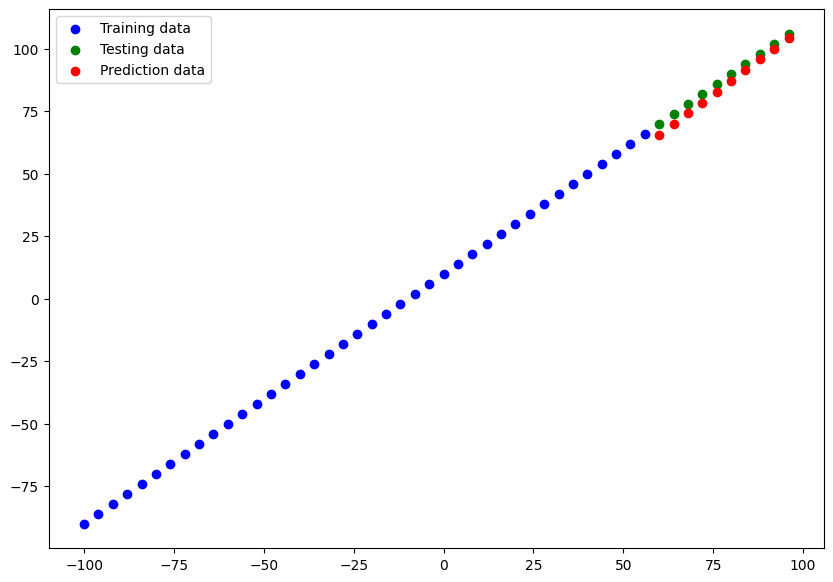

In [ ]:
plot_predictions()

In [ ]:
# calculate model_1 evaluation matrix

mae_1 = mae(y_test, y_pred)

In [ ]:
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=2.9700577>

In [ ]:
mse_1 = mse(y_test, y_pred)
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=11.571854>

## **Saving Our Model**

In [ ]:
model_1.save("/content/drive/MyDrive/Tensorflow/Saved_models/Lin_reg_model_1.h5")

## **Load Saved Model**

In [ ]:
# Loading a saved model
loaded_saved_model = tf.keras.models.load_model("/content/drive/MyDrive/Tensorflow/Saved_models/Lin_reg_model_1.h5")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
